# Лекция 15. Расширения SIMD

1. Технологии SIMD  - общие представления
2. MMX (Multimedia Extensions) — мультимедийные расширения
3. Расширение SSE(Streaming SIMD Extensions) потоковое SIMD-расширение процессора
4. Расширение AVX

## 1. Технологии SIMD  - общие представления

Термин **SIMD** обозначает сокращение от single instruction, multiple data - отдельная инструкция-много данных.
SIMD-команды призваны обеспечить параллелизм, а следовательно увеличение производительности на уровне обработки данных, т.е. одной инструкцией можно обрабатать сразу несколько данных.

Начиная с семейств процессоров Pentium II и Pentium с технологией Intel **MMX**, в архитектуры x86-64 было введено множество расширений для выполнения операций SIMD. Эти расширения включают технологию **MMX**, расширения **SSE, SSE2, SSE3, SSE4, AVX, AVX2 и AVX512**. Каждое из этих расширений предоставляет группу инструкций, которые выполняют операции SIMD над упакованными целыми и/или упакованными элементами данных с плавающей точкой.

На текущий момент технлогия **MMX** считается устаревшей. 

Расширения **SSE** прошли ряд этапов.

**SSE1-расширение** увеличивает количество MMX инструкций, а также добавляет операции над упакованными 32-битовыми числами с плавающей точкой. 128-битовый упакованный формат состоит из 32-битовых чисел с плавающей точкой. 128-битовые SSE-регистры (**xmm**) как раз предназначены для выполнения действий над такого рода данными. В
новых 64-битовых процессорах предполагается, что эти регистры будут использоваться для передачи в функции и оттуда числа с плавающей точкой.

Расширение **SSE2** вводит операции над упакованными вещественными числами двойной точности (64-битовыми), расширяет синтаксис команд MMX, а также добавляет новые команды. Как и команды из набора SSE оперируют 128-битовыми регистрами xmm. 

Расширение **SSE3** - дальнейшее расширение технологии SSE, предназначенное для дальнейшего увеличения производительности.

Расширение **SSE4** - дальнейшее расширение SSE, в основном предназначенное для мультимедийных приложений.

**AVX расширение**. 

**AVX** – Advanced Vector Extention, т.е. усовершенствованное векторное расширение. Данный набор расширяет
возможности SSE команд. Кроме того, вводится набор 256-битовых регистров (ymm, являющихся расширение регистров xmm). По сути команды AVX расширения повторяют часть команд SSE, но несколько в ином формате.

**Регистр управления**

Для управления операциями **SSE** с плавающей точкой используется 32-битный регистр состояния и управления **SSE MXCSR**. Первые 16 бит имеют определенное значение:

- 0 (IE): Флаг исключения недопустимой операции. Устанавливается, если была попытка выполнить недопустимую операцию
- 1 (DE): Флаг исключения денормализации. Устанавливается, если результат операции - денормализованное значение
- 2 (ZE): Флаг нулевого исключения. Устанавливается, если была предпринята попытка деления на 0.
- 3 (OE): Флаг переполнения. Устанавливается, если было переполнение.
- 4 (UE): Флаг потери значимости (underflow). Устанавливается, если была потеря значимости
- 5 (PE): Флаг потери точности. Устанавливается, если была потеря точности.
- 6 (DAZ): Денормализованные значения равны 0. Если установлено, денормализованные значения обрабатываются как 0.
- 7 (IM): Неверная маска операции. Если установлено, исключения недопустимой операции игнорируются
- 8 (DM): Денормализованная маска. Если установлено, исключения денормализации игнорируются
- 9 (ZM): Маска деления на ноль. Если установлено, исключения деления на ноль игнорируются
- 10 (OM): Маска переполнения. Если установлено, исключения переполнения игнорируются
- 11 (UM): Маска потери значимости. Если установлено, исключения потери значимости игнорируются
- 12 (PM): Маска точности. Если установлено, исключения точности игнорируются
- 13-14: Управление округлением. может принимать ряд значений:

            00: округление до ближайшего
            01: округление до -бесконечности
            10: округление до +бесконечности
            11: округление до 0 (усечение)

- 15 (FTZ): Сброс до нуля. Когда установлено, все условия потери значимости устанавливают регистр в 0

Остальне биты 16-32 зарезервированы и в настоящее время не имеют значения.

Доступ к регистру SSE MXCSR осуществляется с помощью следующих двух инструкций: **ldmxcsr**, **stmxcsr**.
Инструкция **ldmxcsr** загружает регистр MXCSR из 32-битной переменной. Инструкция **stmxcsr** сохраняет текущее содержимое регистра MXCSR в 32-битную переменную. Как правило, данный регистр применяется для установки режима округления.

## 2. MMX (Multimedia Extensions) — мультимедийные расширения

Технология **MMX**  была разработана в компании Intel и предназначено для упрощенной обработки двоичных массивов данных. 

Для программиста данное расширение представляет восемь 64-разрядных регистров **mm0, mm1, mm2, mm3, mm4, mm5, mm6, mm7** а также оперций над ними. Однако физически данные регистры - это младшие части 80-разрядных стековых регистров **St(i)** математического сопроцессора. Это определяет ограничения по работе с ними - использовать совместно команды над регистрами mmx и команды математического сопроцессора нельзя. Если  все же такая необходимость появляется, нужно сохранить содержимое регистров, а после выполнения требуемого действия, вновь восстановить их.

Регистры MMX можно разбить следующим образом:
- 2 32-битных значения
- 4 16-битных значения
- 8 8-битных значений
**Регистры MMX не могут быть легко использованы для 64-битной арифметики.** 

Упрощенно идею параллелизма можно продемонстрировать на примере загрузки в MMX регистр восьми восьмибитных чисел:

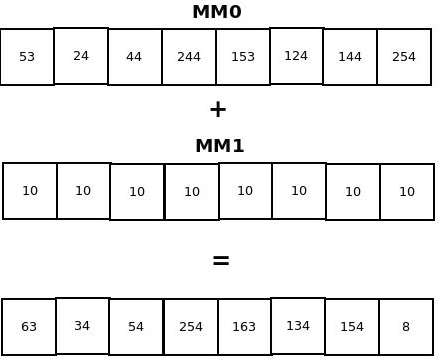

Таким образом, мы по сути выполняем 8 сложений за одну инструкцию. При этом нужно обратить внимание на насыщение в последнем разряде: 254+10 = 264 mod 256 = 8.

Полный перечень инструкций с регистрами **MMX** можно посмотреть по [ссылке 1](https://docs.oracle.com/cd/E18752_01/html/817-5477/eojdc.html), а также [ссылке 2](https://linasm.sourceforge.net/docs/instructions/simd.php). 

Ниже мы рассмотрим лишь инструкции, необходимые для демонстрации приведенного примера. 

Для удобства сравнения полученных результатов ниже выполнен перевод чисел в 16-ю систему счисления. Итоговый результат наоборот переведен в десятичную систему счисления:

In [1]:
print(hex(53), hex(24), hex(44), hex(244), hex(153), hex(124), hex(144), hex(254))

0x35 0x18 0x2c 0xf4 0x99 0x7c 0x90 0xfe


In [22]:
print(hex(53+10), hex(24+10), hex(44+10), hex(244+10), hex(153+10), hex(124+10), hex(144+10), hex((254+10)% 256))

0x3f 0x22 0x36 0xfe 0xa3 0x86 0x9a 0x8


In [23]:
0x3f2236fea3869a08

4549259040890722824

Ниже представлена соответствующая программа на языке ассемблере

In [ ]:
;;mmx.asm

format elf64
public _start

include "func.asm"

section '.data' writeable
 
 number_1 dq 0x35182cf4997c90fe ;Загружаем по-байтно первое число
 number_2 dq 0x0a0a0a0a0a0a0a0a ;Загружаем по-байтно второе число
 
section '.bss' writeable
 
 buffer rb 100 
 res rq 1

section '.text' executable

_start:
  emms                   ;Инициализируем регистры MMX
  movq mm0, [number_1]   
  movq mm1, [number_2]
  
  paddb mm0, mm1         ;Выполняем по-байтное сложение
  
  movq [res], mm0        ;Сохраняем результат в ячейке памяти 
  
  ;;Печатаем рерзультат
  mov rax, [res]
  mov rsi, buffer
  call number_str
  call print_str
  call new_line
  
  ;;Завершаем программу
  mov rax, 60
  mov rdi, 0
  syscall

Из скриншота видно, что результат получился ожидаемый:

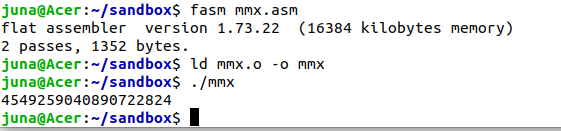

In [9]:
hex(4549259040890722824)

'0x3f2236fea3869a08'

Нужно отметить, что на сегодняшний день технология **MMX** устарела. На ее смену пришли расширенные **SSE/AVX**.

## 3. Расширение SSE(Streaming SIMD Extensions) потоковое SIMD-расширение процессора

В **SSE** оперируют шестнадцатью (16) 128-битными регистрами **xmm0, xmm1, ..., xmm15**.

Такие регистры могут хранить одно 32-разрядное значение с плавающей точкой (то есть значение типа dword **double**) или четыре значения с плавающей точкой одинарной точности (то есть вектор из 4-х значений **float**). Они также могут использоваться для хранение целочисленных значений: вектор с 16 значениями **byte**, с 8 значениями **word** (16 бит), 4 числами **long** (32 бита).

Элементы вектора также группируются по дорожкам (lane):  биты с 0 по 7 — это дорожка 0, биты с 8 по 15 — дорожка 1, биты с 16 по 23 — дорожка 2, и так далее. 

#### **Передача, копирование данных**

Для загрузки целочисленных и вещественных значений из памяти в регистры xmm или наоборот, а также из регистра в регистр можно использовать инструкции:
- **movd** - оперирует 32-разрядными числами
- **movq** - оперирует 64-разрядными числами.

In [ ]:
;;movdq

format elf64
public _start

include "func.asm"
extrn printf

section '.data' writeable
 
 a dd 0xffffffff ;32-битное число
 b dq 0xffffffffffffffff ;64-битное число
 c dq 3.141592653589793 ;double
 prt db "%.15f", 0xa, 0
 
section '.bss' writeable
 
 buffer rb 100 
 resd rd 1
 resq rq 1

section '.text' executable

_start:

  ;;загружаем в xmm числа разной разрядности
  movd xmm0, [a]   
  movq xmm15, [b]
  movq xmm10, [c]
  
  ;;перегружаем в память числа разной разрядности  
  movd [resd], xmm0
  movq [resq], xmm15
  
  xor rax, rax
  mov eax, [resd]  
  
  
  ;;Печатаем рерзультат
  mov rsi, buffer
  call number_str
  call print_str
  call new_line
  
  xor rax, rax
  mov rax, [resq]  
  
  
  ;;Печатаем рерзультат
  mov rsi, buffer
  call number_str
  call print_str
  call new_line
  
  movq xmm0, xmm10
  mov rax, 1
  mov rdi, prt
  call printf
  
  ;;Завершаем программу
  mov rax, 60
  mov rdi, 0
  syscall

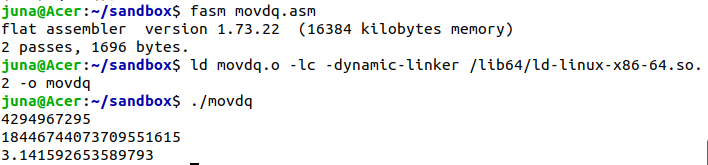

In [26]:
hex(4294967295)

'0xffffffff'

In [27]:
hex(18446744073709551615)

'0xffffffffffffffff'

Для копирования отдельных чисел с плавающей точкой также есть пара инструкций:
- **movss**: копирует одно 32-разрядное число с плавающей точкой;
- **movsd**: копирует одно 64-разрядное число с плавающей точкой.

**Для копирования вектора** или набора данных предусмотрен ряд инструкций, которые могут копировать либо **выровненные**, либо **не выровненные** данные.

**Для копирования выровненных данных** расширения SSE предоставляют следующий набор инструкций

- **movaps**: копирование набора 32-разрядных чисел;
- **movapd**: копирование набора 64-разрядных чисел;
- **movdqa**: копирование восьмеричного слова.

Эти инструкции копируют 16 байтов данных между памятью и регистрами XMM или между двумя регистрами XMM.  Буква **a** в названии инструкций означает "aligned" (выровненный). Выравнивание заключается в дополнении данных незначащими символами до заданной границы выравнивания при необходимости. Для выравнивания раздела используется директива **align**. При копировании с помощью **movaps, movdqa** переменные должны быть выровнены по 16-байтовой границе (т.е. адрес памяти переменной должен нацело делиться на 16), для **movapd** выравнивание должно быть по  32-байтовой границе.

Все это позволяет организовать эффективное копирование областей памяти. Ниже представлена программа, демонстрирующая использование этих инструкций.

In [ ]:
;;mova.asm

format elf64
public _start

include "func.asm"

section '.data' writeable align 16
 
 source db  "abcdefghijklmo", 0 
 
section '.bss' writeable align 16
 
 receiver rd 4

section '.text' executable

_start:

  ;;Копируем области памяти
  mov rax, source
  movaps xmm0, [rax]
  mov rax, receiver
  movaps [rax], xmm0
  
  ;;Печатаем результат
  mov rsi, receiver
  call print_str
  call new_line
   
  ;;Завершаем программу
  mov rax, 60
  mov rdi, 0
  syscall

В область памяти **source** загружается 15 байтов: первые 14 - это символы, последний байт обозначает нулевой символ конца строки. 

Обратите внимание на директиву **align** перед началом разделов **.data**, **.bss**. Благодаря этому адреса переменных **source, receiver** делятся на 16 (выровнены по границе 16 байт), а к 15 байтам .data добавлен еще один байт.

Это демонстрирует следующий скриншот:

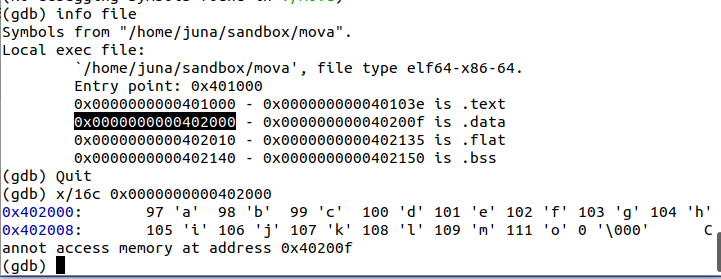

In [5]:
 print(0x40200/16, 0x402140/16)

16416.0 262676.0


Ниже также показана работа программы:

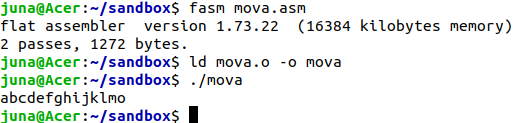

Допустим, мы уберем выравнивание из раздела .bss. Тогда это не гарантирует выравнивание этого раздела и приведет в ошибке, что демонстрирует ряд скриншотов:

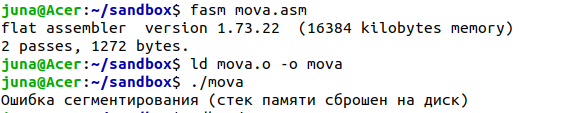

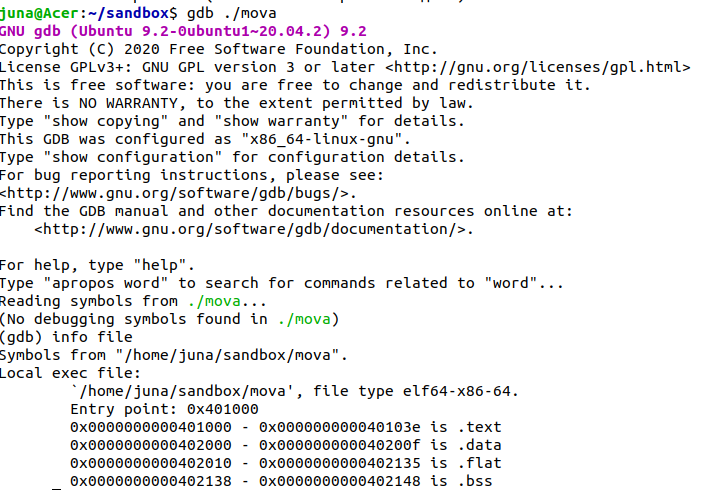

Теперь адрес .bss не кратен 16.

In [6]:
0x402138/16

262675.5

В итоге, в нашей программе область памяти source копируется в  receiver за одну инструкцию.

Существуют также команды копирования без необходимости выравнивания: например, у нас перед переменной source идут еще какие-то переменные, если выравнять область, то будут выровнены и эти переменные, что, как правило, увеличит размер выделенной памяти.

Команды копирования без выравнивания:

- **movups**: копирование невыровненных 4-байтных чисел
- **movupd**: копирование невыровненных 8-байтных чисел
- **movdqu**: копирование невыровненных 16-байтных чисел

Буква u является сокрашением от "unaligned" ("невыровненный"). Эти команды работают также, как предыдущие, однако не требуют выравнивания. Плата за отсутствие необходимости выравнивания - они работают медленнее.

In [ ]:
;;movu.asm

format elf64
public _start

include "func.asm"

section '.data' writeable
 
 source db  "abcdefghijklmo", 0 
 
section '.bss' writeable
 
 receiver rd 4

section '.text' executable

_start:

  ;;Копируем области памяти
  mov rax, source
  movupd xmm0, [rax]
  mov rax, receiver
  movupd [rax], xmm0
  
  ;;Печатаем результат
  mov rsi, receiver
  call print_str
  call new_line
   
  ;;Завершаем программу
  mov rax, 60
  mov rdi, 0
  syscall

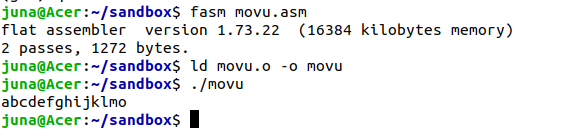

### **Преобразование чисел**

Расширение **SSE** предоставляют ряд инструкций для преобразования чисел с плавающей точкой в целые числа и наоборот. Подобные инструкции могут преобразовывать как одно скалярное значение, так и вектор значений.

**Для преобразования скалярных значений** имеются следующие инструкции:

|Команда|Назначение|
|-------|----------|
|**cvtsd2si**| преобразует 64-разрядное число с плавающей точкой в 32- или 64-битное целое число. Для округления применяется режим, установленный в регистре MXCSR. Результат сохраняется в 32- или 64-битном регистре общего назначения.|
|**cvtsd2ss**| преобразует 64-разрядное число с плавающей точкой (в регистре XMM или переменной) в число 32-разрядное число с плавающей точкой и оставляет результат в втором операнде - регистре XMM. Для округления применяется режим, установленный в регистре MXCSR.|
|**cvtsi2sd**| преобразует 32- или 64-разрядное целое число из регистра общего назначения или переменной в 64-разрядное число с плавающей точкой, оставляя результат в регистре XMM.|
|**cvtsi2ss**| преобразует 32- или 64-разрядное целое число в целочисленном регистре или переменной в 32-разрядное число с плавающей точкой, оставляя результат в регистре XMM.|
|**cvtss2sd**| преобразует 32-разрядное число с плавающей точкой из регистра XMM или переменной в 64-разрядное число с плавающей точкой, оставляя результат в регистре XMM в первом операнде.|
|**cvtss2si**| преобразует 32-разрядное число с плавающей точкой из регистра XMM или переменной в целое число и оставляет результат в 32- или 64-битном регистре общего назначения. Для округления применяется режим, установленный в регистре MXCSR.|
|**cvttsd2si**| преобразует 64-разрядное число с плавающей точкой в 32- или 64-битное целое число. Преобразование выполняется с использованием усечения (не использует биты управления округлением в MXCSR). Результат сохраняется в 32- или 64-битном регистре общего назначения.|
|**cvttss2si**| преобразует 32-разрядное число с плавающей точкой в 32- или 64-битное целое число. Преобразование выполняется с использованием усечения (не использует биты управления округлением в MXCSR). Результат сохраняется в 32- или 64-битном регистре общего назначения.|

По умолчанию округление идет до ближайшего целого, но это можно регулировать меняя 13 и 14 биты регистра управления **MXCSR**. Рассмотрим небольшой пример на использование этих инструкций.

In [ ]:
;;cvt.asm

format elf64
public _start

include "func.asm"

section '.data' writeable
 
 number_1 dq 3.14
 number_2 dq 9.5
 
section '.bss' writeable
 
 buffer rb 100
 state dd 1

section '.text' executable

_start:

  ;;Загружаем вещественное число из памяти number_1 и преобразуем его в целое с округлением до ближайшего
  movsd xmm0, [number_1]
  cvtsd2si rax, xmm0
  
  ;;Печатаем результат
  mov rsi, buffer
  call number_str
  call print_str
  call new_line
  
  ;;Загружаем вещественное число из памяти number_2 и преобразуем его в целое с округлением до ближайшего
  movsd xmm1, [number_2]
  cvtsd2si rax, xmm1
 
  ;;Печатаем результат 
  mov rsi, buffer
  call number_str
  call print_str
  call new_line
  
  ;;Меняем регистр управления, устанавливая округление до большего целого
  stmxcsr [state]       
  or [state], dword 100000000000000b
  ldmxcsr [state]
  
  movsd xmm2, [number_2]
  cvtsd2si rax, xmm2
 
  mov rsi, buffer
  call number_str
  call print_str
  call new_line
  
  ;;Меняем регистр управления, устанавливая округление до меньшего целого
  stmxcsr [state]       
  or [state], dword 010000000000000b
  ldmxcsr [state]
  
  movsd xmm2, [number_2]
  cvtsd2si rax, xmm2
 
  mov rsi, buffer
  call number_str
  call print_str
  call new_line
  
  ;;Завершаем программу
  mov rax, 60
  mov rdi, 0
  syscall

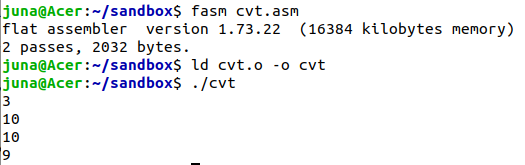

#### **Преобразования векторов**


Также имеется набор инструкций, которые выполняет преобразование чисел в векторах из одного типа в другой.

|Команда|Назначение|
|-------|----------|
|**cvtdq2pd**|преобразует два 32-разрядных целых числа со знаком в два 64-разрядных числа с плавающей точкой
|**cvtdq2ps**|преобразует 4 32-разрядных целых числа со знаком в 4 32-разрядных числа с плавающей точкой|
|**cvtpd2dq**|преобразует два 64-разрядных числа с плавающей точкой в два 32-разрядных целых числа со знаком|
|**cvtpd2ps**|преобразует два 64-разрядных числа с плавающей точкой в два 32-разрядных числа с плавающей точкой|
|**cvtps2dq**|преобразует 4 32-разрядных числа с плавающей точкой в 4 32-разрядных целых числа со знаком|
|**cvtps2pd**|преобразует два 32-разрядных числа с плавающей точкой в два 64-разрядных числа с плавающей точкой|
|**cvttpd2dq**|преобразует два 64-разрядных числа с плавающей точкой в два 32-разрядных целых числа со знаком|
|**cvttps2dq**|преобразует 4 32-разрядных числа с плавающей точкой в 4 32-разрядных целых числа со знаком|

Эти инструкции удобно использовать в ситуации, когда надо преобразовать вектор значений. Например, преобразуем набор 32-разрядных чисел с плавающей точкой в набор целых 32-разрядных чисел:



In [ ]:
;;cvt_2.asm

format elf64
public _start

include "func.asm"

section '.data' writeable align 16
 
 float_array dd 3.6, 6.7, 8.9, 1.1
 
section '.bss' writeable align 16
 
 buffer rb 100
 int_array rd 4

section '.text' executable align 16

_start:
   ;;Загружаем данные из массива и преобразуем их в целые числа
   mov rax, float_array
   cvttps2dq xmm0, [rax]

   ;;Загружаем преобразованный массив из целых чисел в память
   mov rax, int_array
   movupd [rax], xmm0 
 
   ;;Выводим поэлементно целочисленный массив
   mov rdx, 0
   .loop:
   xor rax, rax
   mov eax, [int_array+rdx]
   mov rsi, buffer
   call number_str
   call print_str
   call new_line
   add rdx, 4
   cmp rdx, 16
   je .exit
   jmp .loop
    
 .exit: 
  ;;Завершаем программу
  mov rax, 60
  mov rdi, 0
  syscall

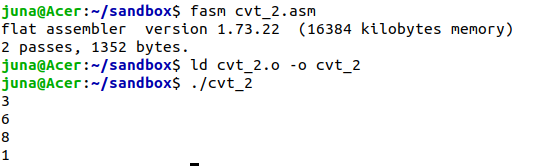

###  Арифметические операции в расширении SSE

Для выполнения арифметических действий над числами с плавающей точкой расширения SSE предоставляет ряд инструкций:

- **addss и addsd**: сложение
- **subss и subsd**: вычитание
- **mulss и mulsd**: умножение
- **divss и divsd**: деление
- **minss и minsd**: вычисляют минимальное значение двух операндов, сохраняя минимальное значение в первом операнде.
- **maxss и maxsd**: вычисляют максимальное значение двух операндов, сохраняя минимальное значение в первом операнде.
- **sqrtss и sqrtsd**: вычисляют квадратный корень второго операнда и сохраняют результат в первый операнд

Инструкции, которые оканчиваются на ss, предназначены для 32-разрядных чисел с плавающей точкой (ss - сокращение от "scalar single"). Инструкции, которые оканчиваются на sd, предназначены для 64-разрядных чисел с плавающей точкой (sd - сокращение от "scalar double"). 

Общий синтаксис этих команд:

> Команда xmm, xmm

> Команда xmm, mem32

> Команда xmm, mem64

> Команда mem32, xmm

> Команда mem64, xmm

Ниже приведена программа, демонстрирующая использование данных команд.

In [ ]:
;;arith.asm

format elf64
public _start

extrn printf
extrn scanf

section '.data' writeable 
 
 scf db "%lf", 0
 prt db "%.16f", 0xa, 0
 
section '.bss' writeable 
 
 number_1 rq 1
 number_2 rq 1 

section '.text' executable

_start:

  ;;Читаем данные с клавиатуры
  mov rax, 1
  mov rdi, scf
  mov rsi, number_1
  movsd xmm0, [rsi]
  call scanf
  
  mov rax, 1
  mov rdi, scf
  mov rsi, number_2
  movsd xmm0, [rsi]
  call scanf
  
  ;Извлекаем квадратный корень из первого числа ии выводим результат
  sqrtsd xmm1, [number_1]
  
  movsd xmm0, xmm1
  mov rax, 1
  mov rdi, prt
  call printf
  
  ;Складываем числа
  movsd xmm10, [number_1]
  addsd xmm10, [number_2] 
  
  ;Вычитаем числа
  movsd xmm11, [number_1]
  subsd xmm11, [number_2] 
  
  ;Умножаем числа
  movsd xmm12, [number_1]
  mulsd xmm12, [number_2] 
  
  ;Делим числа
  movsd xmm13, [number_1]
  divsd xmm13, [number_2] 
  
  ;Находим минимум
  movsd xmm14, [number_1]
  minsd xmm14, [number_2] 
  
  ;Находим максимум
  movsd xmm15, [number_1]
  maxsd xmm15, [number_2] 
  
  ;Печатаем результаты
  movsd xmm0, xmm10
  mov rax, 1
  mov rdi, prt
  call printf
  
  movsd xmm0, xmm11
  mov rax, 1
  mov rdi, prt
  call printf
  
  movsd xmm0, xmm12
  mov rax, 1
  mov rdi, prt
  call printf
  
  movsd xmm0, xmm13
  mov rax, 1
  mov rdi, prt
  call printf
  
  movsd xmm0, xmm14
  mov rax, 1
  mov rdi, prt
  call printf
  
  movsd xmm0, xmm15
  mov rax, 1
  mov rdi, prt
  call printf
 
  ;;Завершаем программу
  mov rax, 60
  mov rdi, 0
  syscall

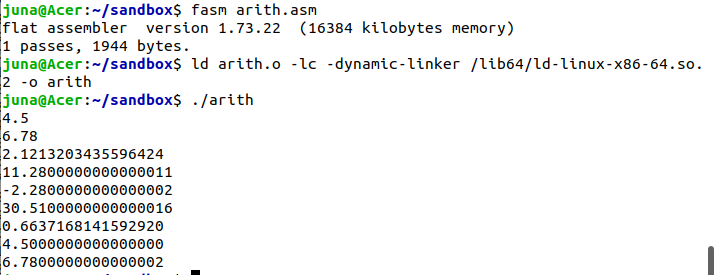

Конечно, здесь реализуются и векторные операции.

#### **Векторное сложение**

- **paddb**: сложение байтов в 16 дорожках
- **paddw**: сложение слов (значений .short/.word) в 8 дорожках
- **paddd**: сложение двойных слов (значений .long) в 4 дорожках
- **paddq**: сложение четверных слов (тип .quad) в 2 дорожках

Эти инструкции с двумя операндами складывают соответствующие дорожки двух операндов и результат помещают в первый операнд. 

Эти инструкции не влияют ни на какие флаги и, таким образом, не указывают, когда во время выполнения этих инструкций происходит переполнение (со знаком или без знака). Если перенос происходит во время добавления, перенос теряется.

Дополнительно **SSE** предоставляют инструкции, которые используют так называемую "арифметику насыщения". 

Для сложения без знака переполнение усекается до максимально возможного значения, которое может выдержать размер инструкции. Например, если сложение двух байтовых значений превышает 0xFF, арифметика насыщения дает 0xFF — максимально возможное 8-битное значение без знака. Аналогично, если при вычитании произойдет потеря значимости (underflow), то результат округляется до 0. Для арифметики насыщения со знаком отсечение происходит при наибольшем положительном и наименьшем отрицательном значениях. 

- **paddsb**: сложение байтов со знаком в 16 дорожках
- **paddsw**: сложение слов со знаком в 8 дорожках
- **paddusb**: сложение беззнаковых байтов в 16 дорожках
- **paddusw**: сложение беззнаковых слов в 8 дорожках

Также в расширении **SSE** реализовано так называемое "горизонтальное сложение":
- **phaddw**: сложение 16-битных чисел
- **phaddd**: сложение 32-битных чисел
- **phaddsw**: сложение 16-битных чисел с насыщением

Инструкции горизонтального сложения складывают соседние слова или двойные слова обоих операндов и сохраняют сумму в дорожке регистра из первого операнда. Например, 

> phaddw xmm0, xmm1

дает следующий результат:

> xmm0[0-15] = xmm0[0-15] + xmm0[16-31]

> xmm0[16-31] = xmm0[32-47] + xmm0[48-63]

> xmm0[32-47] = xmm0[64-79] + xmm0[80-95]

> xmm0[48-63] = xmm0[96-111] + xmm0[112-127]

> xmm0[64-79] = xmm1[0-15] + xmm1[16-31]

> xmm0[80-95] = xmm1[32-47] + xmm1[48-63]

> xmm0[96-111] = xmm1[64-79] + xmm1[80-95]

> xmm0[112-127] = xmm1[96-111] + xmm1[112-127]

Если при горизонтальном сложеним с помощью инструкций phaddw и phaddd происходит переполнение, то оно просто игнорируется. При горизонтальном сложении с насыщением с помощью phaddsw любое (положительное) переполнение приводит к значению 0x7FFF, независимо от фактического результата. Аналогично, любое отрицательное значение потери значимости приводит к значению 0x8000.

#### **Векторное вычитание**

Для вычитания соответствующих элементов векторов применяются следующие инструкции:

- **psubb**: вычитание байтов в 16 дорожках
- **psubw**: вычитание слов (значений .short/.word) в 8 дорожках
- **psubd**: вычитание двойных слов (значений .long) в 4 дорожках
- **psubq**: вычитание четверных слов (тип .quad) в 2 дорожках

Инструкции с двумя операндами вычитают из первого операнда соответствующие дорожки второго операнда и результат помещают в первый операнд. 

Инструкции вычитания не влияют ни на какие флаги, и любая информация о переносе, заимствовании, переполнении или недостатке будет потеряна.

И аналогично сложению расширение **SSE** предоставляют инструкции для вычитания с насыщением:

- **psubsb**: вычитание байтов со знаком в 16 дорожках
- **psubsw**: вычитание слов со знаком в 8 дорожках
- **psubusb**: вычитание беззнаковых байтов в 16 дорожках
- **psubusw**: вычитание беззнаковых слов в 8 дорожках

Инструкций для вычитания однобайтовых чисел со знаком насыщают положительное переполнение до 0x7F (+127) и отрицательное переполнение до 0x80 (-128). Инструкции для вычитания 2-байтных чисел (слов) насыщаются до 0x7FFF (+32 767) и до 0x8000 (-32 768) соответственно. Инструкции насыщения без знака насыщают до 0xFFFF (+65 535) и 0 соответственно.

#### **Векторное умножение**

Расширение **SSE** предоставляют ряд инструкций для умножения чисел. Однако при перемножении $n$-битовых чисел в общем случае может получиться $2n$-битовое число, поэтому в результате сохраняют только часть результата: 
- **pmullw**: перемножает слова (word) из 8 дорожек, младшее слово результата помещается в итоговую дорожку
- **pmulhuw**: перемножает беззнаковые слова из 8 дорожек, старшее слово результата помещается в итоговую дорожку
- **pmulhw**: перемножает слова со знаком из 8 дорожек, старшее слово результата помещается в итоговую дорожку
- **pmulld**: перемножает двойные слова (dword) из 4 дорожек, младшее двойное слово результата помещается в итоговую дорожку

Схематично это выглядит так:

Temp0[63:0] := SRC1[31:0] * SRC2[31:0]

Temp1[63:0] := SRC1[63:32] * SRC2[63:32]

Temp2[63:0] := SRC1[95:64] * SRC2[95:64]

Temp3[63:0] := SRC1[127:96] * SRC2[127:96]

DEST[31:0] := Temp0[31:0]

DEST[63:32] := Temp1[31:0]

DEST[95:64] := Temp2[31:0]

DEST[127:96] := Temp3[31:0]

Рассмотрим пример на использование векторных операций.

In [ ]:
;;arithv.asm

format elf64
public _start

include "func.asm"
extrn printf

section '.data' writeable 
 
 array_one dd 1, 2, 3, 15
 array_two dd 4, 5, 2, 9
 prt db "%d, %d, %d, %d", 0xa, 0
 
section '.text' executable

_start:

  ;;Загружаем области
  mov rax, array_one
  movups xmm0, [rax]
  mov rax, array_two
  movups xmm1, [rax]
  
  ;;Векторне сложение
  paddd xmm0, xmm1
  
  ;;Извлекаем данные, печатаем результат
  movd esi, xmm0
  psrldq xmm0, 4  ; сдвиг вправо в XMM0 для получения следующего числа
  movd edx, xmm0
  psrldq xmm0, 4
  movd ecx, xmm0
  psrldq xmm0, 4
  movd r8d, xmm0
  mov rdi, prt
  call printf
  
  ;;Загружаем области
  mov rax, array_one
  movups xmm0, [rax]
  mov rax, array_two
  movups xmm1, [rax]
  
  ;;Векторное вычитание
  psubd xmm0, xmm1
  
  ;;Извлекаем данные, печатаем результат
  movd esi, xmm0
  psrldq xmm0, 4 
  movd edx, xmm0
  psrldq xmm0, 4
  movd ecx, xmm0
  psrldq xmm0, 4
  movd r8d, xmm0
  mov rdi, prt
  call printf
  
  ;;Загружаем области
  mov rax, array_one
  movups xmm0, [rax]
  mov rax, array_two
  movups xmm1, [rax]
  
  ;;Векторное умножение
  pmulld xmm0, xmm1
  
  ;;Извлекаем данные, печатаем результат
  movd esi, xmm0
  psrldq xmm0, 4 
  movd edx, xmm0
  psrldq xmm0, 4
  movd ecx, xmm0
  psrldq xmm0, 4
  movd r8d, xmm0
  mov rdi, prt
  call printf
  
  ;;Завершаем программу
  mov rax, 60
  mov rdi, 0
  syscall

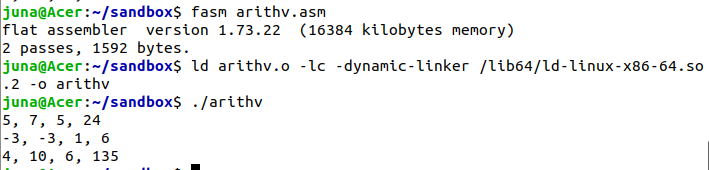

#### **Векторное сравнение чисел**

**Сравнение целых чисел**

Для векторного сравнения целых чисел используют следующие инструкции:
- **pcmpeqb** сравнивает 16 байтовых дорожек
- **pcmpeqw** сравнивает 8 дорожек с числами word
- **pcmpeqd** сравнивает 4 дорожек с числами dword
- **pcmpeqq**  сравнивает 2 дорожки с числами qword

Инструкции устанавливают значение всех битов 1, если два значения в одной дорожке равны. Если значения не равны, то устанавливается 0 для всех бит. Результат сравнения сохраняется в первом операнде.

Следующие инструкции проверяют, больше ли первый операнд чем второй:
- **pcmpgtb**  сравнивает байты в 16 дорожках
- **pcmpgtw**  сравнивает числа word в 8 дорожках
- **pcmpgtd**  сравнивает числа dword в 4 дорожках
- **pcmpgtq**  сравнивает числа qword в 2 дорожках
Инструкции устанавливают значение всех битов в 1, если значение из первого операнда больше значения из второго. Иначе устанавливается 0 для всех бит. Результат сравнения сохраняется в первом операнде.

#### **Сравнение чисел с плавающей точкой**

Для сравнения отдельных чисел с плавающей точкой расширение **SSE** предоставляют набор инструкций, которые сохраняют значение true (все биты 1) или false (все биты 0) во втором операнде:

- **cmpss xmmn, xmmm/mem32, imm8**
- **cmpsd xmmn, xmmm/mem64, imm8**
- **cmpeqss xmmn, xmmm/mem32**       операнды равны
- **cmpltss xmmn, xmmm/mem32**       первый операнд меньше второго
- **cmpless xmmn, xmmm/mem32**       первый операнд меньше или равен второму
- **cmpunordss xmmn, xmmm/mem32**    неупорядоченное сравнение (один из операндов или оба равны NaN)
- **cmpneqss xmmn, xmmm/mem32**      операнды не равны
- **cmpnltss xmmn, xmmm/mem32**      первый операнд НЕ меньше второго
- **cmpnless xmmn, xmmm/mem32**      первый операнд НЕ меньше или равен второму
- **cmpordss xmmn, xmmm/mem32**      упорядоченное сравнение
- **cmpeqsd xmmn, xmmm/mem64**       операнды равны
- **cmpltsd xmmn, xmmm/mem64**       первый операнд меньше второго
- **cmplesd xmmn, xmmm/mem64**       первый операнд меньше или равен второму
- **cmpunordsd xmmn, xmmm/mem64**    неупорядоченное сравнение (один из операндов или оба равны NaN)
- **cmpneqsd xmmn, xmmm/mem64**      операнды не равны
- **cmpnltsd xmmn, xmmm/mem64**      первый операнд НЕ меньше второго
- **cmpnlesd xmmn, xmmm/mem64**      первый операнд НЕ меньше или равен второму
- **cmpordsd xmmn, xmmm/mem64**      упорядоченное сравнение

Первые две инструкции могут в качестве третьего операнда (imm8) принимать значение от 0 до 7, которое указывает на принцип сравнения:

- 0: Первый операнд == второй операнд
- 1: Первый операнд < второй операнд
- 2: Первый операнд <= второй операнд
- 3: Неупорядоченное сравнение
- 4: Первый операнд ≠ второй операнд
- 5: Первый операнд не меньше второго операнда (>=)
- 6: Первый операнд не меньше или равен второму операнду (>)
- 7: Упорядоченное сравнение

Эти инструкции устанавливают в 0 (неверно, ложь) или 1 (верно, истина) все биты в первом операнде. После сравнения значение из регистра XMM можно поместить в регистр общего назначения и проверить этот регистр на наличие нуля/не нуля. Для этого можно использовать инструкции movq или movd. 

Рассмотрим небольшой пример.

In [ ]:
;;cmp.asm

format elf64
public _start

extrn printf

section '.data' writeable 
 
 a dq 3.14
 b dq 3.14
 c dq 3.1
 
 prt_1 db "Equal", 0xa, 0
 prt_2 db "No Equal", 0xa, 0
 
section '.text' executable

_start:

  ;;Загружаем области
  movsd xmm0, [a]
  movsd xmm1, [b]
  movsd xmm2, [c]
  
  ;;Сравниваем два числа
  cmpeqsd xmm0, xmm1
  
  ;Загружаем результат сравнения в регистр rax
  movq rax, xmm0
  
  ;;Если rax = -1, условие верно
  cmp rax, -1
  jne .ne
  
  mov rdi, prt_1
  call printf
  jmp .next
  .ne:
  mov rdi, prt_2
  call printf

.next:
  movsd xmm0, [a]
  cmpeqsd xmm0, xmm2
  
  movq rax, xmm0
  
  cmp rax, -1
  jne .nne
  
  mov rdi, prt_1
  call printf
  jmp .exit
  .nne:
  mov rdi, prt_2
  call printf
.exit: 
  ;;Завершаем программу
  mov rax, 60
  mov rdi, 0
  syscall

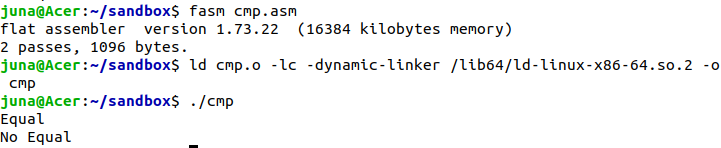

## 4. Расширение AVX

Дальнейшее развитие технологий **SIMD** привело к расширению **AVX**. Архитектура **AVX2** поддерживает шестнадцать 256-битных регистров **YMM** (YMM0-YMM15). Архитектура **AVX-512** поддерживает до 32-х 512-битных регистров **ZMM** (ZMM0-ZMM31).

В целом все рассмотренные команды **SSE** в **AVX** также поддерживаются, они даже дублируют названия с добавлением перед SSE-командой аббревиатуры **v**: **vmovsd,  vmovapd** и т.д. Подробно данный перечень команд можно изучить по [ссылке](https://linasm.sourceforge.net/docs/instructions/simd.php).